In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Label encoder-TO convert Categorical values to numerical values(ML prefers numbers and not categorical)
from sklearn.preprocessing import LabelEncoder
columns_to_encode=['age','sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target']
label_encoder=LabelEncoder()

for column in columns_to_encode:
  df[column]=label_encoder.fit_transform(df[column])
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     29    1   3        31    64    1        0       49      0       22   
1      3    1   2        22    80    0        1       84      0       32   
2      7    0   1        22    35    0        0       71      0       14   
3     22    1   1        14    67    0        1       76      0        8   
4     23    0   0        14   145    0        1       62      1        6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   23    0   0        28    71    0        1       23      1        2   
299   11    1   3         8    93    0        1       32      0       12   
300   34    1   0        30    26    1        1       40      0       31   
301   23    1   0        22     1    0        1       16      1       12   
302   23    0   1        22    67    0        0       73      0        0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [ ]:
df.shape

(303, 14)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming df is your DataFrame
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Hyperparameter tuning with a more extensive grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(random_state=1, max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_poly, y_train)
best_model = grid_search.best_estimator_

# Predictions
y_pred_logreg = best_model.predict(X_test_poly)

# Evaluation
print(confusion_matrix(y_test, y_pred_logreg))
print('Accuracy :', accuracy_score(y_test, y_pred_logreg))
print('Precision:', precision_score(y_test, y_pred_logreg))
print('Recall:', recall_score(y_test, y_pred_logreg))
print('f1 score:', f1_score(y_test, y_pred_logreg))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

[[19 11]
 [ 3 28]]
Accuracy : 0.7704918032786885
Precision: 0.717948717948718
Recall: 0.9032258064516129
f1 score: 0.8


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, y_pred_knn))
print('Accuracy :', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('f1 score:', f1_score(y_test, y_pred_knn))


[[21  9]
 [ 4 27]]
Accuracy : 0.7868852459016393
Precision: 0.75
Recall: 0.8709677419354839
f1 score: 0.8059701492537312


In [ ]:
#criteria -Gini Index
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
y_pred_dt=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy :',accuracy_score(y_test,y_pred_dt))
print('Precision:',precision_score(y_test,y_pred_dt))
print('Recall:',recall_score(y_test,y_pred_dt))
print('f1 score:',f1_score(y_test,y_pred_dt))

[[21  9]
 [10 21]]
Accuracy : 0.6885245901639344
Precision: 0.7
Recall: 0.6774193548387096
f1 score: 0.6885245901639343


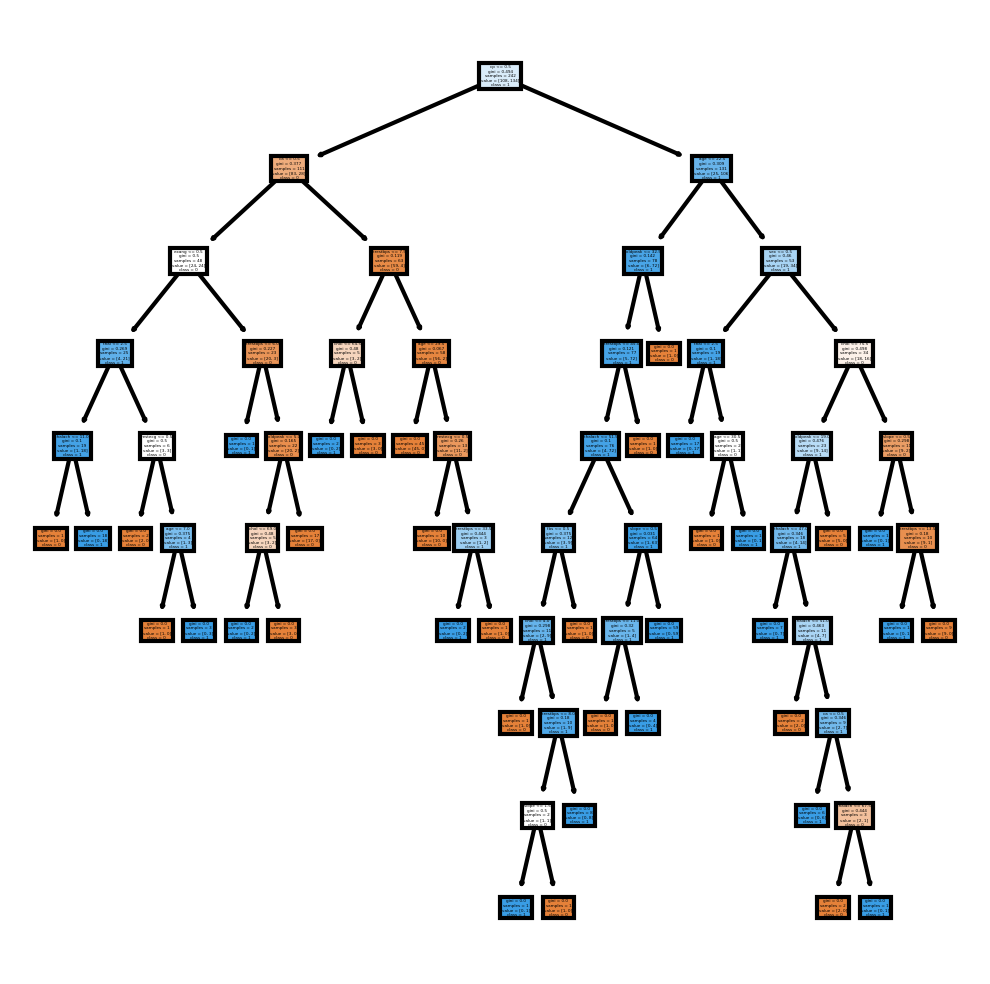

In [ ]:
#viualizing the tree
from sklearn.tree import plot_tree
fn=list(X_train)
cn=['0','1']
plt.figure(figsize=(4,4),dpi=300)
plot_tree(dtree,feature_names=fn,class_names=cn,filled=True);

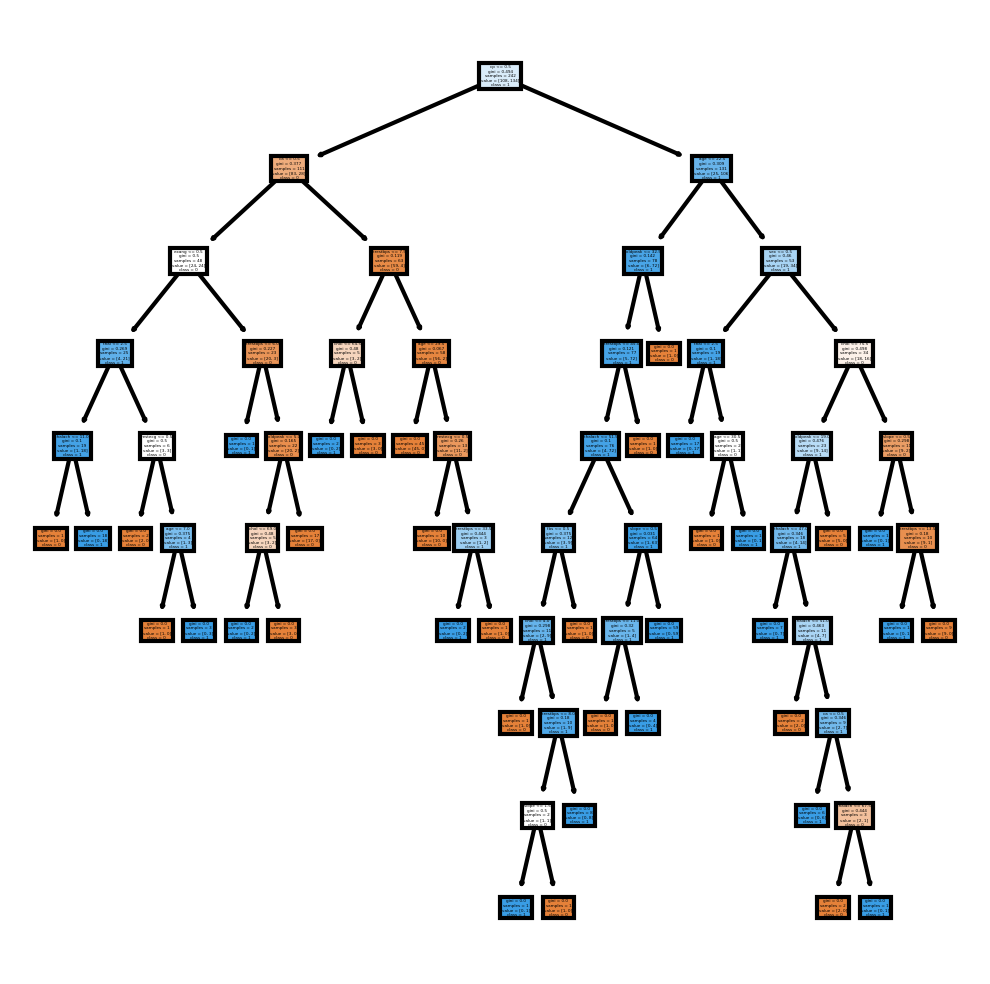

In [ ]:
#viualizing the tree
from sklearn.tree import plot_tree
fn=list(X_train)
cn=['0','1']
plt.figure(figsize=(4,4),dpi=300)
plot_tree(dtree,feature_names=fn,class_names=cn,filled=True);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtree.fit(X_train,y_train)
y_pred_dtt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dtt))
print('Accuracy:', accuracy_score(y_test,y_pred_dtt))
print('Precision:', precision_score(y_test,y_pred_dtt))
print('recall:', recall_score(y_test,y_pred_dtt))
print('f1 score:', f1_score(y_test,y_pred_dtt))

[[22  8]
 [10 21]]
Accuracy: 0.7049180327868853
Precision: 0.7241379310344828
recall: 0.6774193548387096
f1 score: 0.7


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.01,random_state=1)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print('Accuracy:', accuracy_score(y_test,y_pred_svm))
print('Precision:', precision_score(y_test,y_pred_svm))
print('recall:', recall_score(y_test,y_pred_svm))
print('f1 score:', f1_score(y_test,y_pred_svm))

[[19 11]
 [ 4 27]]
Accuracy: 0.7540983606557377
Precision: 0.7105263157894737
recall: 0.8709677419354839
f1 score: 0.782608695652174


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,random_state=1)
rf_classifier.fit(X_train,y_train)
y_pred_rf = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[23  7]
 [ 8 23]]
0.7540983606557377
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.77      0.74      0.75        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster=GradientBoostingClassifier(learning_rate=0.6,random_state=1)
gradient_booster.fit(X_train,y_train)
y_pred_gredboost = gradient_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_gredboost))
print(accuracy_score(y_test,y_pred_gredboost))
print(classification_report(y_test,y_pred_gredboost))

[[20 10]
 [ 9 22]]
0.6885245901639344
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

[[20 10]
 [10 21]]
0.6721311475409836
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        30
           1       0.68      0.68      0.68        31

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier(learning_rate=1,random_state=1)
model.fit(X_train,y_train)
y_pred_xgb=model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[20 10]
 [ 8 23]]
0.7049180327868853
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.70      0.74      0.72        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model1=CatBoostClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred_cat=model1.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

Learning rate set to 0.005621
0:	learn: 0.6887883	total: 48ms	remaining: 47.9s
1:	learn: 0.6837475	total: 49.4ms	remaining: 24.6s
2:	learn: 0.6801343	total: 50.7ms	remaining: 16.8s
3:	learn: 0.6751374	total: 52ms	remaining: 12.9s
4:	learn: 0.6720573	total: 53.3ms	remaining: 10.6s
5:	learn: 0.6675870	total: 54.5ms	remaining: 9.03s
6:	learn: 0.6631765	total: 55.7ms	remaining: 7.91s
7:	learn: 0.6584288	total: 56.9ms	remaining: 7.06s
8:	learn: 0.6540439	total: 58.1ms	remaining: 6.4s
9:	learn: 0.6497831	total: 59.3ms	remaining: 5.87s
10:	learn: 0.6458296	total: 60.3ms	remaining: 5.42s
11:	learn: 0.6416997	total: 61.6ms	remaining: 5.07s
12:	learn: 0.6383128	total: 62.9ms	remaining: 4.78s
13:	learn: 0.6340953	total: 64.1ms	remaining: 4.51s
14:	learn: 0.6297491	total: 65.4ms	remaining: 4.29s
15:	learn: 0.6254305	total: 66.8ms	remaining: 4.11s
16:	learn: 0.6215932	total: 68ms	remaining: 3.93s
17:	learn: 0.6183185	total: 69.2ms	remaining: 3.77s
18:	learn: 0.6145229	total: 70.4ms	remaining: 3.63s

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_knn,y_pred_svm,y_pred_dt]).T
meta_learner=RandomForestClassifier(random_state=1)
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[21  9]
 [ 3 28]]
0.8032786885245902
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_svm,y_pred_dt]).T
meta_learner=RandomForestClassifier(random_state=1)
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[17 13]
 [ 1 30]]
0.7704918032786885
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        30
           1       0.70      0.97      0.81        31

    accuracy                           0.77        61
   macro avg       0.82      0.77      0.76        61
weighted avg       0.82      0.77      0.76        61



In [ ]:
from sklearn.ensemble import RandomForestClassifier #ask
X=np.array([y_pred_rf,y_pred_gredboost,y_pred_abc,y_pred_xgb,y_pred_cat]).T
meta_learner=RandomForestClassifier(random_state=1)
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[24  6]
 [ 5 26]]
0.819672131147541
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.84      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
### Manual Hyperparameter Tuning
model=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10,random_state=100)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[20 10]
 [ 7 24]]
0.7213114754098361
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       0.71      0.77      0.74        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {#'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['gini']}
print(random_grid)

{'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini']}


In [ ]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 670,
 'criterion': 'gini'}

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print("accuracy score{}".format(accuracy_score(y_test,y_pred)))

accuracy score0.7049180327868853


In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[21  9]
 [ 9 22]]
Accuracy Score 0.7049180327868853
Classification report:               precision    recall  f1-score   support

           0       0.70      0.70      0.70        30
           1       0.71      0.71      0.71        31

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



In [ ]:
rf_randomcv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 670,
 'criterion': 'gini'}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    #'max_depth': [rf_randomcv.best_params_['max_depth']],
    #'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    #'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     #rf_randomcv.best_params_['n_estimators'],
                     #rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4]}


In [ ]:
# Fit the grid_search to the data
rf=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3)

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("accuracy score{}".format(accuracy_score(y_test,y_pred)))
print("classification report:{}".format(classification_report(y_test,y_pred)))

[[20 10]
 [ 7 24]]
accuracy score0.7213114754098361
classification report:              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       0.71      0.77      0.74        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [ ]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a9eaea8e074951ed43cc987b8d499f877b83c22f3a98f074b9b8d53db723e2e4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


     target
204       0
159       1
219       0
174       0
184       0
..      ...
0         1
288       0
259       0
179       0
110       1

[61 rows x 1 columns]


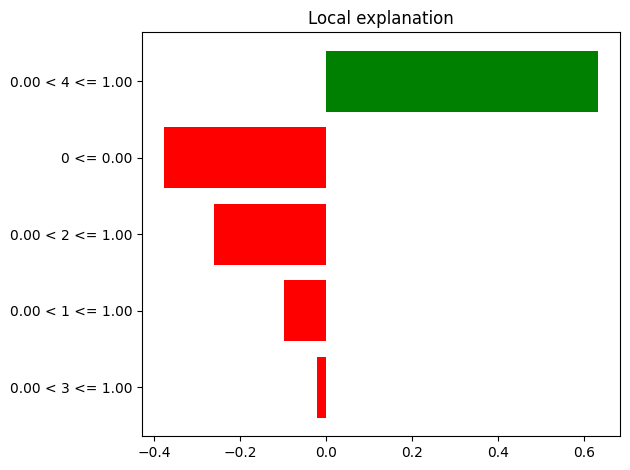

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['PCOS (Y/N)'],mode='regression')
exp = explainer.explain_instance(X.values[1], meta_learner.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

     target
204       0
159       1
219       0
174       0
184       0
..      ...
0         1
288       0
259       0
179       0
110       1

[61 rows x 1 columns]


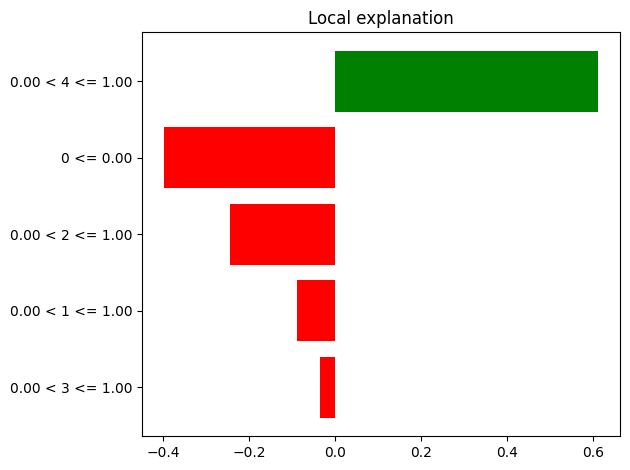

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd # Import pandas

# Convert X to a DataFrame if it's not already
X = pd.DataFrame(X)  # Assuming X is your NumPy array

y = pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                 class_names=['PCOS (Y/N)'], mode='regression')

# Now explain a prediction
exp = explainer.explain_instance(X.values[1], meta_learner.predict, num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

     target
204       0
159       1
219       0
174       0
184       0
..      ...
0         1
288       0
259       0
179       0
110       1

[61 rows x 1 columns]


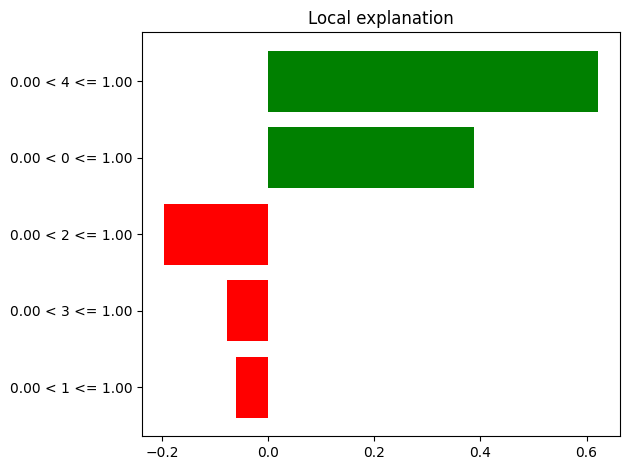

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['PCOS (Y/N)'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[50], meta_learner.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.01)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[19 11]
 [ 4 27]]
0.7540983606557377
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.71      0.87      0.78        31

    accuracy                           0.75        61
   macro avg       0.77      0.75      0.75        61
weighted avg       0.77      0.75      0.75        61



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


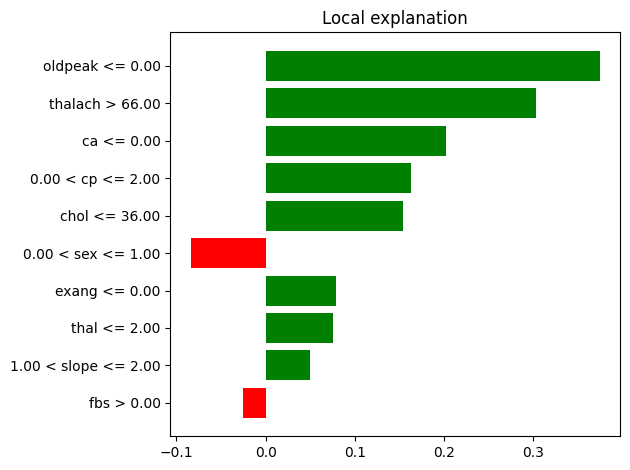

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test.values,feature_names=X_train.columns.values.tolist(),class_names=['PCOS (Y/N)'],mode='regression')
exp = explainer.explain_instance(X_test.values[50], clf.predict,num_features=10)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
  exp.show_in_notebook(show_table=True)

In [ ]:
import pandas as pd
new_data = pd.DataFrame({
    'age':62,
    'sex':0,
    'cp':0,
    'trestbps':140,
    'chol':394,
    'fbs':0,
    'restecg':0,
    'thalach':157,
    'exang':0,
    'oldpeak':1.2,
    'slope':1,
    'ca':0,
    'thal':2,
    },index=[0])

In [ ]:
new_data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   57    1   2       140   240    1        1      120      1      2.3      1   

   ca  thal  
0   1     2

In [ ]:
rf.fit(X_train, y_train)
p = rf.predict(new_data)
if p[0] == 0:
  print("Heart disease has not been detected in the individual")
else:
  print("Heart disease has been detected in the individual")

Heart disease has not been detected in the individual
